# Exercise 2

Question. Download the sqlite3 database from hw1-population.db.
Examine data. What columns does it have? (2 points) How many rows (think: people) does it have? (2 points)

Examine the distribution of the ages in the dataset. In particular, be sure to have your code report the mean, standard deviation, minimum, maximum. (2 points) Plot a histogram of the distribution with an appropriate number of bins for the size of the dataset (describe in your readme the role of the number of bins). (3 points) Comment on any outliers or patterns you notice in the distribution of ages. (1 point)

Repeat the above for the distribution of weights. (3 points)

Make a scatterplot of the weights vs the ages. (3 points) Describe the general relationship between the two variables (3 points). You should notice at least one outlier that does not follow the general relationship. What is the name of the person? (3 points) Be sure to explain your process for identifying the person whose values don't follow the usual relationship in the readme. (3 points)

_Below is the code to load the dataset._

In [14]:
## Importing the ibraries pandas and sqlite3 and loading the dataset. 

import pandas as pd
import sqlite3
with sqlite3.connect("/Users/mahimakaur/Downloads/hw1-population.db") as db:
    data = pd.read_sql_query("SELECT * FROM population", db)

In [15]:
##Overview of the dataset

data

,name,age,weight,eyecolor
0,Edna Phelps,88.895690,67.122450,brown
1,Cara Yasso,9.274597,29.251244,brown
2,Gail Rave,18.345613,55.347903,brown
3,Richard Adams,16.367545,70.352184,brown
4,Krista Slater,49.971604,70.563859,brown
...,...,...,...,...
152356,John Fowler,23.930833,71.532569,blue
152357,Diana Shuffler,21.884819,67.936753,brown
152358,Kevin Cuningham,87.705907,60.074646,brown
152359,James Libengood,21.727666,81.774985,brown


**Part1**: Examine data. What columns does it have? How many rows does it have?

_Below is the code to find the columns and number of rows in the dataset._

In [16]:
data.info()

print("The columns in the data include:", ", ".join(list(data.columns)))
print("There are", data['name'].count(), "rows in the data.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152361 entries, 0 to 152360
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   name      152361 non-null  object 
 1   age       152361 non-null  float64
 2   weight    152361 non-null  float64
 3   eyecolor  152361 non-null  object 
dtypes: float64(2), object(2)
memory usage: 4.6+ MB
The columns in the data include: name, age, weight, eyecolor
There are 152361 rows in the data.


**Response**: The dataset has four columns namely : _name_, _age_, _weight_, _eyecolor_. There are _152361_ rows (people) in the dataset.

**Part2**: Examine the distribution of the ages in the dataset. In particular, be sure to have your code report the mean, standard deviation, minimum, maximum. Plot a histogram of the distribution with an appropriate number of bins for the size of the dataset (describe in your readme the role of the number of bins). Comment on any outliers or patterns you notice in the distribution of ages.

*Below is the code to examine the distribution of age in the dataset.*

In [17]:
##To examine the distribution of the age in the dataset.

data['age'].describe()

count    152361.000000
mean         39.510528
std          24.152760
min           0.000748
25%          19.296458
50%          38.468955
75%          57.623245
max          99.991547
Name: age, dtype: float64

_Below is the code for Age distribution._

Freedman–Diaconis number of bins: 70


Text(0.5, 1.0, 'Age Distribution of the Population')

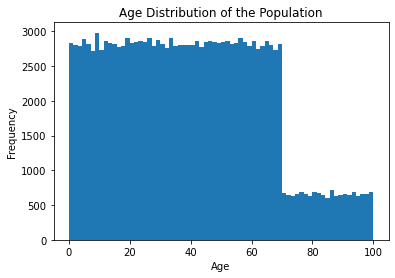

In [18]:
## import libraries matplotlib and numpy

import matplotlib.pyplot as plt
import numpy as np

age = data['age'] #Creating a variable age

## Calculating bins for the histogram using Freedman–Diaconis rule:

q1 = age.quantile(0.25)
q3 = age.quantile(0.75)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(age) ** (1 / 3))
bin_count = int(np.ceil((age.max() - age.min()) / bin_width))
print("Freedman–Diaconis number of bins:", bin_count)

##Histogram of the Age Distribution 

plt.hist(age, bins=bin_count);
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age Distribution of the Population')

Sturges Rule number of bins: 19


Text(0.5, 1.0, 'Age Distribution of the Population')

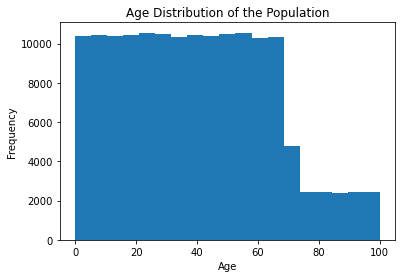

In [19]:
## Calculating bins for the histogram using Sturges rule:

SR_bin_count = int(np.ceil(np.log2(len(age))) + 1)
print("Sturges Rule number of bins:", SR_bin_count)

##Plot 

plt.hist(age, bins = SR_bin_count);
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Age Distribution of the Population')

**Response:** The mean age is 39.5 years, and the maximum age included in the dataset is 99 years. It is important to have appropriate number of bins as if we take less bins, the histogram doesn't portray the data accurately. If large number of bins are used, the graph does not give a sense of the distribution of the dataset.I have calculated the width of bins using Freedman–Diaconis rule. Freedman-Diaconis rule not only considers the sample size but also considers the spread of the sample. Another method through which the bin size can be calculated is Sturge’s rule. 
Sturges rule takes into account the size of the data to decide on the number of bins. 

From the graph it seems that the age distribution is skewed right. 

**Part3**: Repeat the above for the distribution of weights.  

_Below is the code to plot histogram to depict the distribution of weights._

Freedman–Diaconis number of bins: 196


Text(0.5, 1.0, 'Weight Distribution of the Population')

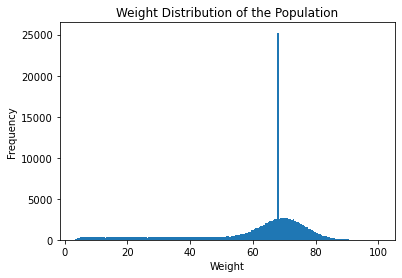

In [20]:
##To depict the distribution of weight 

weight = data['weight'] #Creating a variable weight 

## Calculating bins for the histogram using Freedman–Diaconis rule:

q1 = weight.quantile(0.25)
q3 = weight.quantile(0.75)
iqr = q3 - q1
bin_width = (2 * iqr) / (len(weight) ** (1 / 3))
bin_count_weight = int(np.ceil((weight.max() - weight.min()) / bin_width))
print("Freedman–Diaconis number of bins:", bin_count_weight)

## Histogram

plt.hist(weight, bins= bin_count_weight);
plt.ylabel('Frequency')
plt.xlabel('Weight')
plt.title('Weight Distribution of the Population')

Sturges Rule number of bins: 19


Text(0.5, 1.0, 'Weight Distribution of the Population')

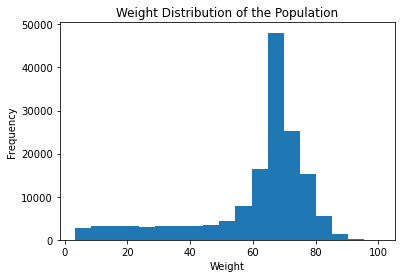

In [21]:
## Calculating bins for the histogram using Sturge's rule:

SR_bin_count_weight = int(np.ceil(np.log2(len(weight))) + 1)
print("Sturges Rule number of bins:", SR_bin_count_weight)

## Histogram depicting the weight distribution 

plt.hist(weight, bins= SR_bin_count_weight);
plt.ylabel('Frequency')
plt.xlabel('Weight')
plt.title('Weight Distribution of the Population')

**Response**: From the histogram distribution of weight it can be inferred that most of the people in the dataset, weighed in the range of 65-75 kg.

**Part4**: Make a scatterplot of the weights vs the ages. (3 points) Describe the general relationship between the two variables (3 points). You should notice at least one outlier that does not follow the general relationship. What is the name of the person? (3 points) Be sure to explain your process for identifying the person whose values don't follow the usual relationship in the readme. (3 points)

_Below is the code to plot the scatterplot between age v/s weight._

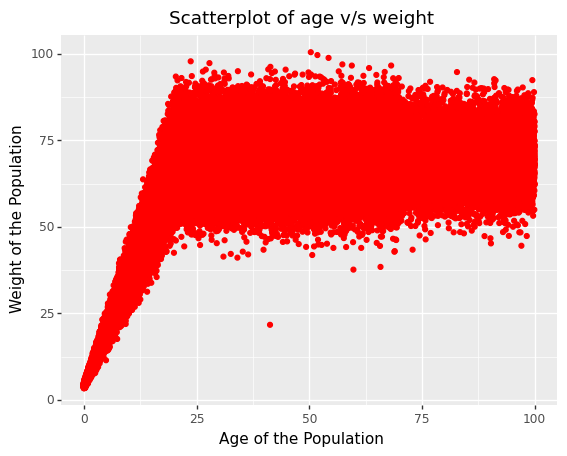

<ggplot: (8773127601619)>

In [22]:
##Importing library

from plotnine import *  

(ggplot(data, 
       aes(x = 'age', y = 'weight')) 
    + geom_point(color = "red")
    + labs(x = 'Age of the Population',
           y = 'Weight of the Population')
    + ggtitle('Scatterplot of age v/s weight'))

_Below is the code to identify the outier that does not follow the general relationship._

In [23]:
outlier_age = data.loc[data['age']>30]
outlier_weight = outlier_age.loc[data['weight']<25]
outlier_name = "".join(outlier_weight['name'])
print("The name of the person who does not follow the general age v/s weight relationship is", '\033[1m' + outlier_name,".")


The name of the person who does not follow the general age v/s weight relationship is Anthony Freeman .


**Response**: From the graph it can be observed that as the age of the person increases the weight also increases. The relatipnship between both the variables is linear. But, after the age of around 20 years, the relationship between tage and weight is stable. 

The person who does not follow the general age v/s weight relationship is Anthony Freeman. Identification of the outlier was made using the scatterplot. In the scatterplot, we can see one point, i.e., between 25-50 years, having a weight less than 25 as an outlier. So, to accurately identify the name, I created a data variable _outlier_age_ of individuals older than 30 years. Then, I narrowed down the dataset to include individuals with weights less than 25. From the dataset's dataframe the name of the individual was identified. 